# Ch. 9 - Event counts

Install `music21` and other elements needed to run this in Colab
environment. Press play and wait for all commands to be executed - this
initial command might take some time as it needs to build the musi21
environment.

## Event counts

In [2]:
from music21 import *                     # activate library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from music21 import *                     # activate library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Define pieces
# These two piece are related, same piece, different harmonisation
bwv110_7 = corpus.parse('bach/bwv110.7.xml') # bwv110.7
bwv40_3 = corpus.parse('bach/bwv40.3.xml')

### Extract key and trasponse to common tonic

In [4]:
k = bwv110_7.analyze('key')
print(k)
i = interval.Interval(k.tonic, pitch.Pitch('C'))
print(i)
bwv110_7 = bwv110_7.transpose(i)

k = bwv40_3.analyze('key')
print(k)
i = interval.Interval(k.tonic, pitch.Pitch('C'))
print(i)
bwv40_3 = bwv40_3.transpose(i)

print('====== Transposed')
t = bwv110_7.analyze('key')
print(t)
t = bwv40_3.analyze('key')
print(t)

b minor
<music21.interval.Interval M-7>
g minor
<music21.interval.Interval P-5>
====== Transposed
c minor
c minor

### Calculate pitch-class distribution

In [5]:
# pitch-class
pcCount = analysis.pitchAnalysis.pitchAttributeCount(bwv110_7, 'pitchClass')
pc = range(0, 12)
pitchclass = ('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B')
l_pcCount = [[i, pcCount[i]]for i in pc]
d = pd.DataFrame(data=l_pcCount, columns=['pc_nro', 'count'])
d['Percentage'] = d['count'] / sum(d['count'])
d["Pitch-Class"] = pitchclass
d["Piece"] = 'BWV 110/7'

pcCount2 = analysis.pitchAnalysis.pitchAttributeCount(bwv40_3, 'pitchClass')
l_pcCount2 = [[i, pcCount2[i]]for i in pc]
d2 = pd.DataFrame(data=l_pcCount2, columns=['pc_nro', 'count'])
d2['Percentage'] = d2['count'] / sum(d2['count'])
d2["Pitch-Class"] = pitchclass
d2["Piece"] = 'BWV 40/3'

PC = pd.concat([d, d2])

### Calculate interval distribution

In [6]:
# intervals
#| echo: true
#| eval: true
df=[]
df2=[]
counts = dict()  # add empty dictionary
for x in range(-12, 13):
   counts[x] = 0

for part in bwv110_7.recurse().parts:
   p = part.recurse(classFilter=('Note', 'Rest'))  # this is ok but loses rests
   intervalStream1 = p.melodicIntervals(skipOctaves=True,skipRests=True)
   items = []
   for i in intervalStream1.recurse():
      items.append(i.semitones)
   for j in items:
      counts[j] = counts.get(j, 0) + 1

df = pd.DataFrame({'Interval': list(counts.keys()),
                   'Counts': list(counts.values())})
df['Percentage'] = df['Counts'] / sum(df['Counts'])
df["Piece"] = 'BWV 110/7'

for part in bwv40_3.recurse().parts:
   p = part.recurse(classFilter=('Note', 'Rest'))  # this is ok but loses rests
   intervalStream1 = p.melodicIntervals()
   items = []
   for i in intervalStream1.recurse():
      items.append(i.semitones)
   for j in items:
      counts[j] = counts.get(j, 0) + 1

df2 = pd.DataFrame({'Interval': list(counts.keys()),
                   'Counts': list(counts.values())})
df2['Percentage'] = df2['Counts'] / sum(df2['Counts'])
df2["Piece"] = 'BWV 40/3'

IV = pd.concat([df, df2])

/var/folders/b0/vtr2rd_96119zlr64t5hvlgr0000gp/T/ipykernel_64404/4086787063.py:12: StreamIteratorInefficientWarning: melodicIntervals is not defined on StreamIterators. Call .stream() first for efficiency
  intervalStream1 = p.melodicIntervals(skipOctaves=True,skipRests=True)
/var/folders/b0/vtr2rd_96119zlr64t5hvlgr0000gp/T/ipykernel_64404/4086787063.py:26: StreamIteratorInefficientWarning: melodicIntervals is not defined on StreamIterators. Call .stream() first for efficiency
  intervalStream1 = p.melodicIntervals()

### Calculate duration distribution

In [7]:
# durations

part = bwv110_7.recurse().parts
p = part.recurse()
durCount = analysis.elements.attributeCount(p, 'quarterLength')
du = pd.DataFrame({'Duration': list(durCount.keys()),
                    'Counts': list(durCount.values())})
du['Percentage'] = du['Counts'] / sum(du['Counts'])

filter = (du['Duration'] < 10)
du = du[filter]
filter = (du['Duration'] >= 0.25)
du = du[filter]
du["Piece"] = 'BWV 110/7'

part = bwv40_3.recurse().parts
p = part.recurse()
durCount = analysis.elements.attributeCount(p, 'quarterLength')
du2 = pd.DataFrame({'Duration': list(durCount.keys()),
                    'Counts': list(durCount.values())})
du2['Percentage'] = du2['Counts'] / sum(du2['Counts'])

filter = (du2['Duration'] < 10)
du2 = du2[filter]
filter = (du2['Duration'] >= 0.25)
du2 = du2[filter]
du2["Piece"] = 'BWV 40/3'

DU = pd.concat([du, du2])

/var/folders/b0/vtr2rd_96119zlr64t5hvlgr0000gp/T/ipykernel_64404/1590200641.py:4: StreamIteratorInefficientWarning: recurse is not defined on StreamIterators. Call .stream() first for efficiency
  p = part.recurse()
/var/folders/b0/vtr2rd_96119zlr64t5hvlgr0000gp/T/ipykernel_64404/1590200641.py:17: StreamIteratorInefficientWarning: recurse is not defined on StreamIterators. Call .stream() first for efficiency
  p = part.recurse()

## Create plots

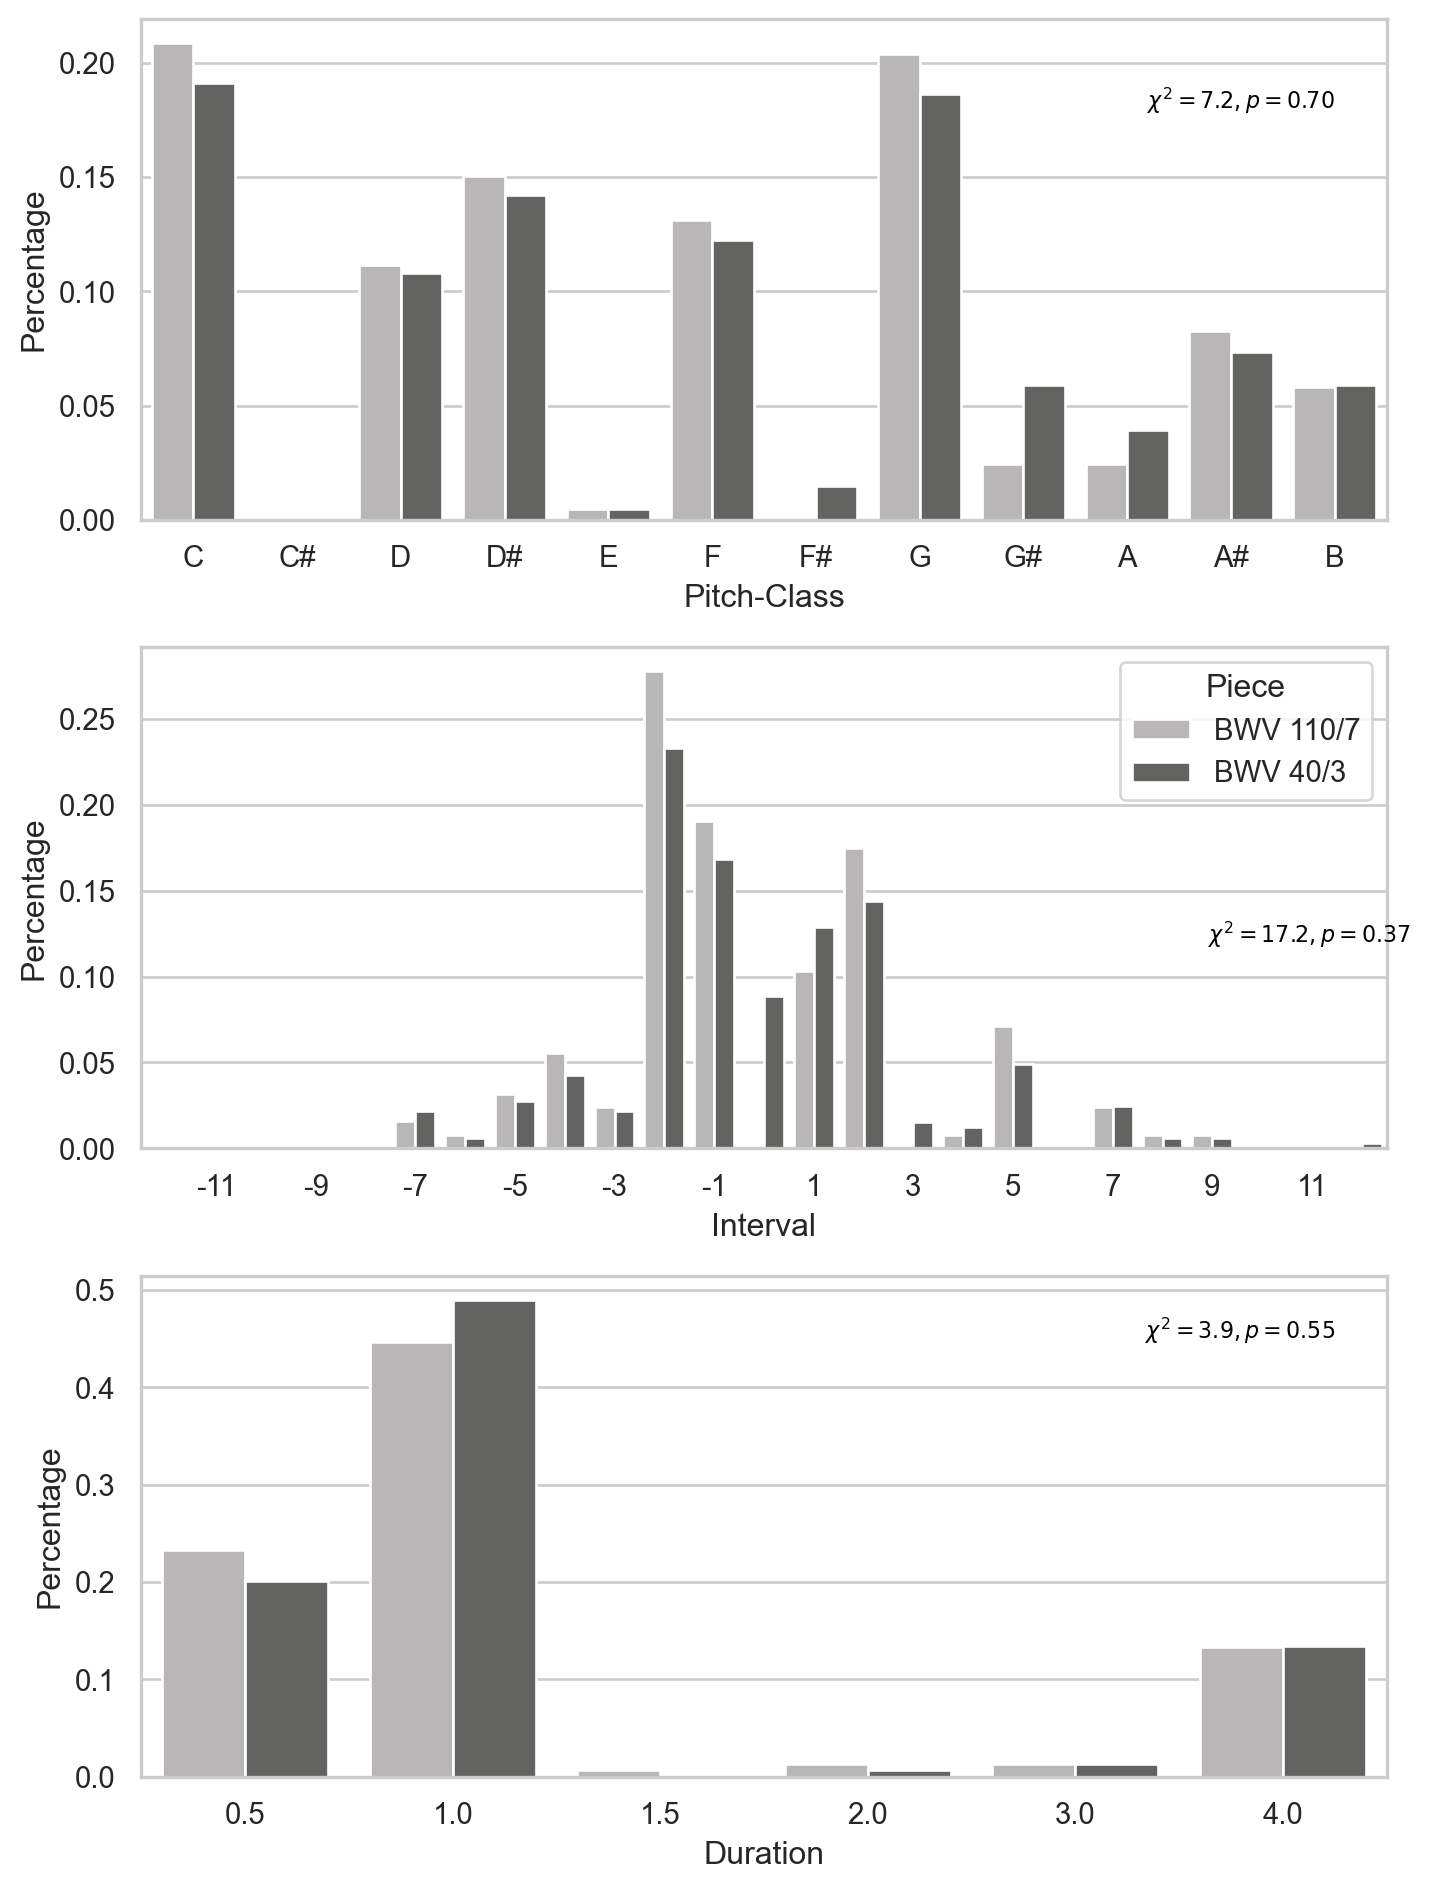

In [8]:
## Set graphic params
sns.set_theme()
sns.set_style("whitegrid")
colors = ["#b8b6b6", "#636362"]
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_palette(customPalette)

plt.rcParams["figure.figsize"] = [7.6, 10.0]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(3, 1)
g = sns.barplot(x='Pitch-Class', y='Percentage', data=PC,
            orient='v', ax=axes[0], hue='Piece')
g.legend_.remove()
axes[0].text(11, 0.18, "$\chi^2=7.2, p=0.70$", horizontalalignment='right', size='x-small', color='black')

bar_plot = sns.barplot(x='Interval', y='Percentage',
                       data=IV, orient='v', ax=axes[1], hue='Piece')
for index, label in enumerate(bar_plot.get_xticklabels()):
   if index % 2 == 1:
      label.set_visible(True)
   else:
      label.set_visible(False)

axes[1].text(25, 0.12, "$\chi^2=17.2, p=0.37$", horizontalalignment='right', size='x-small', color='black')

h = sns.barplot(x='Duration', y='Percentage', data=DU,
            orient='v', ax=axes[2], hue='Piece')

axes[2].text(5.25, 0.45, "$\chi^2=3.9, p=0.55$", horizontalalignment='right', size = 'x-small', color='black')

h.legend_.remove()
plt.show()

## Statistics

### Pitch-class

``` python
from scipy import stats
import numpy as np

PC2 = PC.pivot(index='pc_nro', columns='Piece', values='count')
PC2['Sum'] = PC2.sum(axis=1)
PC3 = PC2[PC2.Sum != 0]
obs2 = np.array([PC3['BWV 110/7'], PC3['BWV 40/3']])
c, p, dof, exp = stats.chi2_contingency(obs2)
print(f"_Chi_$^2$ value = {round(c,2)}, _p_-value = {round(p,3)}, _df_ = {dof}")
```

*Chi*$^2$ value = 7.25, *p*-value = 0.702, *df* = 10

### Intervals

``` python
IV2 = IV.pivot(index='Interval', columns='Piece', values='Counts')
IV2['Sum'] = IV2.sum(axis=1)
IV3 = IV2[IV2.Sum != 0]
obs2 = np.array([IV3['BWV 110/7'], IV3['BWV 40/3']])
c, p, dof, exp = stats.chi2_contingency(obs2)
print(f"_Chi_$^2$ value = {round(c,2)}, _p_-value = {round(p,3)}, _df_ = {dof}")
```

*Chi*$^2$ value = 17.2, *p*-value = 0.373, *df* = 16

### Durations

``` python
DU2 = DU.pivot(index='Duration', columns='Piece', values='Counts')
DU2 = DU2.replace(np.nan,0)
DU2['Sum'] = DU2.sum(axis=1)
DU3 = DU2[DU2.Sum != 0]

obs2 = np.array([DU3['BWV 110/7'], DU3['BWV 40/3']])
c, p, dof, exp = stats.chi2_contingency(obs2)
print(f"_Chi_$^2$ value = {round(c,2)}, _p_-value = {round(p,3)}, _df_ = {dof}")
```

*Chi*$^2$ value = 3.94, *p*-value = 0.558, *df* = 5